In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats # Numeric Vs Categorical
from scipy.stats import f_oneway # ANOVA # Numeric Vs Categorical
from scipy.stats import kruskal # Numeric Vs Categorical
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import norm, t

# IQ improvement with pill

Population average = 100

H0: mu = 100

Ha: mu > 100

In [2]:
# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [3]:
np.mean(iq_scores)

103.5

In [4]:
t_stat, p_value = ttest_1samp(iq_scores, 100)

In [5]:
t_stat

1.5071573172061195

In [6]:
p_value

0.1754994493585011

In [7]:
if p_value < 0.01:
    print("Reject H0")
else:
    print("Fail to reject H0") # Continue to believe null hypothesis

Fail to reject H0


# Drug recovery

In [8]:
d1 = pd.read_csv("drug_1_recovery.csv")
d1.head()

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716


In [9]:
d2 = pd.read_csv("drug_2_recovery.csv")
d2.head()

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593


In [10]:
d1.mean()

drug_1    7.104917
dtype: float64

In [11]:
d2.mean()

drug_2    8.073423
dtype: float64

In [12]:
len(d1)

100

In [13]:
len(d2)

120

In [14]:
# H0: mu1 = mu2 (both drugs are similar)
# Ha: mu1 != mu2
t_stat, p_value = ttest_ind(d1, d2, alternative="two-sided")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

[2.55427147e-07]
Reject H0


In [15]:
# H0: mu1 = mu2 (both drugs are similar)
# Ha: mu1 > mu2
t_stat, p_value = ttest_ind(d1, d2, alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

[0.99999987]
Fail to reject H0


In [16]:
# H0: mu1 = mu2 (both drugs are similar)
# Ha: mu1 < mu2
t_stat, p_value = ttest_ind(d1, d2, alternative="less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

[1.27713574e-07]
Reject H0


In [17]:
d1_mean = d1.mean()
d1_mean

drug_1    7.104917
dtype: float64

In [18]:
d1_std = d1.std()
d1_std

drug_1    1.038696
dtype: float64

In [19]:
num_d1 = len(d1)
num_d1

100

In [20]:
d2_mean = d2.mean()
d2_mean

drug_2    8.073423
dtype: float64

In [21]:
d2_std = d2.std()
d2_std

drug_2    1.553296
dtype: float64

In [22]:
num_d2 = len(d2)
num_d2

120

In [23]:
# In case only the stats (mean and std ) are known
ttest_ind_from_stats(7.1, 1.03, 100, 8.07, 1.55, 120) # mean, std, len of each of the two

Ttest_indResult(statistic=-5.349727397277295, pvalue=2.2219022870449973e-07)

# Sachin 

In [24]:
df = pd.read_csv("Sachin_ODI.csv")

In [25]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


## Is there a difference in his batting pattern across 1st and 2nd innings

In [26]:
df_first_innings = df[df["Inns"]==1]
df_second_innings = df[df["Inns"]==2]

In [27]:
len(df_first_innings)

170

In [28]:
len(df_second_innings)

190

In [29]:
df_first_innings["runs"].mean()

46.67058823529412

In [30]:
df_second_innings["runs"].mean()

40.17368421052632

In [31]:
# H0: mu1 = mu2
# Ha: mu1 != mu2
test_stat, p_value = ttest_ind(df_first_innings["runs"], df_second_innings["runs"])
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.14483724194759962
Fail to reject H0


## Is there a difference in batting pattern across matches won and lost

In [32]:
df_won = df[df["Won"]==True]
df_lost = df[df["Won"]==False]

In [33]:
df_won["runs"].mean()

51.0

In [34]:
df_lost["runs"].mean()

35.13068181818182

In [35]:
# H0: mu1 = mu2
# Ha: mu1 != mu2
test_stat, p_value = ttest_ind(df_won["runs"], df_lost["runs"])
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.00032706154973653116
Reject H0


In [36]:
# H0: mu1 = mu2
# Ha: mu1 > mu2
test_stat, p_value = ttest_ind(df_won["runs"], df_lost["runs"], alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.00016353077486826558
Reject H0


In [37]:
# H0: mu1 = mu2
# Ha: mu1 < mu2
test_stat, p_value = ttest_ind(df_won["runs"], df_lost["runs"], alternative="less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.9998364692251318
Fail to reject H0


# Problems

The average number of customers entering a store every day is 500, with a standard deviation of 125.

A marketing company claims to increase this number. After 70 days, it is seen that the average is 530. Test the claim of the marketing company at a 95% confidence (or 5% significance)

In [38]:
# H0: mu = 500
# Ha: mu > 500

# Test statistic: z-score of the sample mean 
# Right tailed

z_stat = (530 - 500) / (125/np.sqrt(70))
p_value = 1 - norm.cdf(z_stat)
alpha = 0.05

print(p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")


0.022322492581293485
Reject H0


# T-distribution

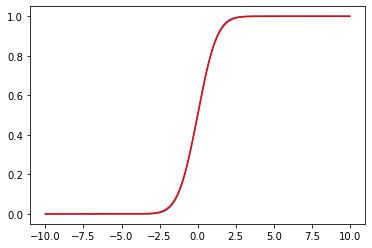

In [39]:
x_values = np.linspace(-10, 10, 1000)
y_values_z = norm.cdf(x_values)
plt.plot(x_values, y_values_z)

y_values_t = t.cdf(x_values, df=30) # as df increases, the t-distribution comes close to Gaussian
plt.plot(x_values, y_values_t, "r")

# Aerofit

In [40]:
df_aerofit = pd.read_csv("aerofit.csv")

In [41]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [42]:
df_aerofit.shape

(180, 9)

In [43]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

## Gender Vs Income

<AxesSubplot:xlabel='Gender', ylabel='Income'>

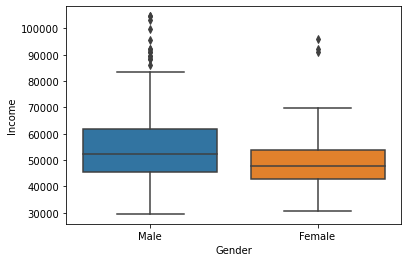

In [44]:
sns.boxplot(x='Gender', y='Income', data=df_aerofit) 

In [45]:
income_male = df_aerofit[df_aerofit["Gender"]=="Male"]["Income"]
income_female = df_aerofit[df_aerofit["Gender"]=="Female"]["Income"]

In [46]:
income_male.mean()

56562.75961538462

In [47]:
income_female.mean()

49828.90789473684

In [48]:
# H0: male income = female income

test_stat, p_value = ttest_ind(income_male, income_female, alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else: 
    print("Fail to reject H0")

0.003263631548607129
Reject H0


## Product Vs Income

<AxesSubplot:xlabel='Product', ylabel='Income'>

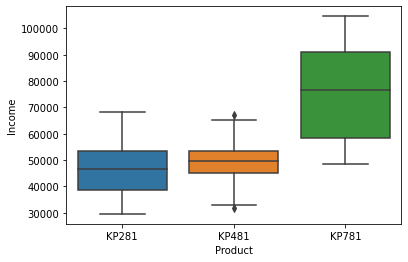

In [49]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [50]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [51]:
test_stat, p_value = ttest_ind(income_kp481, income_kp281)
if p_value < 0.05:
    print("Reject H0")

In [52]:
# H0: All groups have same mean
# Ha: Atleast one group is different
f_stat, p_value = f_oneway(income_kp281, income_kp481, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

1.5644991316342494e-27
Reject H0


In [53]:
kruskal(income_kp281, income_kp481, income_kp781)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

## Does gender impact product

In [54]:
gender_product = pd.crosstab(index=df_aerofit['Gender'],columns=df_aerofit['Product'])
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [55]:
# H0: Gender and product are not related
# Ha: Gender impacts which product
chi_stat, p_value, dof, expected = chi2_contingency(gender_product)
print(expected)
print(p_value)
print(dof)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")


[[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]
0.0015617972833158714
2
Reject H0


# Gender Vs Purchase

In [56]:
# Male and female on Online and offline shopping
observed = [
    [527, 72],
    [206, 102]
]

In [57]:
# H0: Gender does not influence buying pattern
test_stat, p_value, df, exp_values = chi2_contingency(observed)
print(p_value)
print(df)
print(exp_values)

4.268230756875865e-14
1
[[484.08710033 114.91289967]
 [248.91289967  59.08710033]]


In [59]:
# Conclusion: Reject H0. This means that gender affects buying pattern

In [60]:
# Female(60, 54, 46, 41, 201), Male(40, 44, 53, 57, 194) and Total(100, 98, 99, 98, 395),

observed = [
    [60,54,46,41],
    [40, 44, 53, 57]
]

chi2_contingency(observed)

(8.006066246262538,
 0.045886500891747214,
 3,
 array([[50.88607595, 49.86835443, 50.37721519, 49.86835443],
        [49.11392405, 48.13164557, 48.62278481, 48.13164557]]))

In [61]:
observed = [
    [8,9,11,12],
    [6,8,10,4],
    [14,12,18,9],
    [20,22,25,23]
]

chi2_contingency(observed)


(4.4928936593636415,
 0.8760885899556653,
 9,
 array([[ 9.09952607,  9.66824645, 12.13270142,  9.09952607],
        [ 6.36966825,  6.76777251,  8.492891  ,  6.36966825],
        [12.05687204, 12.81042654, 16.07582938, 12.05687204],
        [20.47393365, 21.7535545 , 27.2985782 , 20.47393365]]))

In [62]:
f_oneway([8,9,11,12],[6,8,10,4],[14,12,18,9],[20,22,25,23])

F_onewayResult(statistic=25.221574344023324, pvalue=1.8124793267561276e-05)

In [63]:
f_oneway([300,400,300,500,0],[600,300,300,400,0],[700,300,400,600,500])

F_onewayResult(statistic=1.7009345794392525, pvalue=0.22369016930991845)

In [64]:
observed = [
    [73,77],
    [38,36],
    [18,16]
]

chi2_contingency(observed)

(0.2783677795442502,
 0.8700680171370752,
 2,
 array([[75., 75.],
        [37., 37.],
        [17., 17.]]))

In [66]:
ttest_ind_from_stats(2.87, 1.08, 150, 2.56, 1.28, 200, alternative = "greater")

Ttest_indResult(statistic=2.3947738234213953, pvalue=0.008579470194694676)

In [2]:
f_oneway([58,61,64,60,66,65,62,61,67,63,69,70], [67,68,72,66,65,69,71,70,65,64,68], [69,66,65,72,69,70,71,68,69,73])

F_onewayResult(statistic=9.468627407522332, pvalue=0.0006489702197555994)

In [3]:
data = sns.load_dataset('tips')

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
data["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [9]:
data.loc[data["total_bill"] == data["total_bill"].max()]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [4]:
observed = [
    [20,94,84,17],
    [68,7,119,26],
    [5,16,29,14],
    [15,10,54,14]
]

observed = np.array(observed).T

chi2_contingency(observed)

(138.28984162600827,
 2.3252867870988044e-25,
 9,
 array([[ 39.22297297,  40.13513514,  11.67567568,  16.96621622],
        [ 46.12331081,  47.19594595,  13.72972973,  19.95101351],
        [103.86824324, 106.28378378,  30.91891892,  44.92905405],
        [ 25.78547297,  26.38513514,   7.67567568,  11.15371622]]))